In [1]:
import pandas as pd
import numpy as np
billet=pd.read_csv('C:/Users/lenovo/OneDrive/Desktop/p10/billets.csv',delimiter=';')
billet.head()

is_genuine  diagonal  height_left  height_right  margin_low  margin_up  \
0        True    171.81       104.86        104.95        4.52       2.89   
1        True    171.46       103.36        103.66        3.77       2.99   
2        True    172.69       104.48        103.50        4.40       2.94   
3        True    171.36       103.91        103.94        3.62       3.01   
4        True    171.73       104.28        103.46        4.04       3.48   

   length  
0  112.83  
1  113.09  
2  113.16  
3  113.51  
4  112.54

In [2]:
billet.head()


is_genuine  diagonal  height_left  height_right  margin_low  margin_up  \
0        True    171.81       104.86        104.95        4.52       2.89   
1        True    171.46       103.36        103.66        3.77       2.99   
2        True    172.69       104.48        103.50        4.40       2.94   
3        True    171.36       103.91        103.94        3.62       3.01   
4        True    171.73       104.28        103.46        4.04       3.48   

   length  
0  112.83  
1  113.09  
2  113.16  
3  113.51  
4  112.54

In [3]:
billet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   is_genuine    1500 non-null   bool   
 1   diagonal      1500 non-null   float64
 2   height_left   1500 non-null   float64
 3   height_right  1500 non-null   float64
 4   margin_low    1463 non-null   float64
 5   margin_up     1500 non-null   float64
 6   length        1500 non-null   float64
dtypes: bool(1), float64(6)
memory usage: 71.9 KB


# Regression 

In [4]:
billet[billet.margin_low.isna()]

is_genuine  diagonal  height_left  height_right  margin_low  margin_up  \
72          True    171.94       103.89        103.45         NaN       3.25   
99          True    171.93       104.07        104.18         NaN       3.14   
151         True    172.07       103.80        104.38         NaN       3.02   
197         True    171.45       103.66        103.80         NaN       3.62   
241         True    171.83       104.14        104.06         NaN       3.02   
251         True    171.80       103.26        102.82         NaN       2.95   
284         True    171.92       103.83        103.76         NaN       3.23   
334         True    171.85       103.70        103.96         NaN       3.00   
410         True    172.56       103.72        103.51         NaN       3.12   
413         True    172.30       103.66        103.50         NaN       3.16   
445         True    172.34       104.42        103.22         NaN       3.01   
481         True    171.81       103.53        103.96         NaN       2.71   
505         True    172.01       103.97        104.05         NaN       2.98   
611         True    171.80       103.68        103.49         NaN       3.30   
654         True    171.97       103.69        103.54         NaN       2.70   
675         True    171.60       103.85        103.91         NaN       2.56   
710         True    172.03       103.97        103.86         NaN       3.07   
739         True    172.07       103.74        103.76         NaN       3.09   
742         True    172.14       104.06        103.96         NaN       3.24   
780         True    172.41       103.95        103.79         NaN       3.13   
798         True    171.96       103.84        103.62         NaN       3.01   
844         True    171.62       104.14        104.49         NaN       2.99   
845         True    172.02       104.21        104.05         NaN       2.90   
871         True    171.37       104.07        103.75         NaN       3.07   
895         True    171.81       103.68        103.80         NaN       2.98   
919         True    171.92       103.68        103.45         NaN       2.58   
945         True    172.09       103.74        103.52         NaN       3.02   
946         True    171.63       103.87        104.66         NaN       3.27   
981         True    172.02       104.23        103.72         NaN       2.99   
1076       False    171.57       104.27        104.44         NaN       3.21   
1121       False    171.40       104.38        104.19         NaN       3.17   
1176       False    171.59       104.05        103.94         NaN       3.02   
1303       False    172.17       104.49        103.76         NaN       2.93   
1315       False    172.08       104.15        104.17         NaN       3.40   
1347       False    171.72       104.46        104.12         NaN       3.61   
1435       False    172.66       104.33        104.41         NaN       3.56   
1438       False    171.90       104.28        104.29         NaN       3.24   

      length  
72    112.79  
99    113.08  
151   112.93  
197   113.27  
241   112.36  
251   113.22  
284   113.29  
334   113.36  
410   112.95  
413   112.95  
445   112.97  
481   113.99  
505   113.65  
611   112.84  
654   112.79  
675   113.27  
710   112.65  
739   112.41  
742   113.07  
780   113.41  
798   114.44  
844   113.35  
845   113.62  
871   113.27  
895   113.82  
919   113.68  
945   112.78  
946   112.68  
981   113.37  
1076  111.87  
1121  112.39  
1176  111.29  
1303  111.21  
1315  112.29  
1347  110.31  
1435  111.47  
1438  111.49

In [5]:
df_previsions=billet[~billet.margin_low.isna()]
df_previsions.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1463 entries, 0 to 1499
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   is_genuine    1463 non-null   bool   
 1   diagonal      1463 non-null   float64
 2   height_left   1463 non-null   float64
 3   height_right  1463 non-null   float64
 4   margin_low    1463 non-null   float64
 5   margin_up     1463 non-null   float64
 6   length        1463 non-null   float64
dtypes: bool(1), float64(6)
memory usage: 81.4 KB


In [6]:
df_previsions['intercept']=1
df_previsions.head()

C:\Users\lenovo\AppData\Local\Temp\ipykernel_15904\4025270413.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_previsions['intercept']=1


is_genuine  diagonal  height_left  height_right  margin_low  margin_up  \
0        True    171.81       104.86        104.95        4.52       2.89   
1        True    171.46       103.36        103.66        3.77       2.99   
2        True    172.69       104.48        103.50        4.40       2.94   
3        True    171.36       103.91        103.94        3.62       3.01   
4        True    171.73       104.28        103.46        4.04       3.48   

   length  intercept  
0  112.83          1  
1  113.09          1  
2  113.16          1  
3  113.51          1  
4  112.54          1

In [7]:
import statsmodels.api as sm
y=df_previsions['margin_low']
X=df_previsions[['diagonal','height_left','height_right','margin_up','length','intercept']]
lm=sm.OLS(y,X)
results=lm.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             margin_low   R-squared:                       0.477
Model:                            OLS   Adj. R-squared:                  0.476
Method:                 Least Squares   F-statistic:                     266.1
Date:                Mon, 18 Sep 2023   Prob (F-statistic):          2.60e-202
Time:                        12:17:59   Log-Likelihood:                -1001.3
No. Observations:                1463   AIC:                             2015.
Df Residuals:                    1457   BIC:                             2046.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
diagonal        -0.1111      0.041     -2.680      0.007      -0.192      -0.030
height_left      0.1841      0.045      4.113      0.000       0.096       0.272
height_right     0.2571      0.043      5.978      0.000       0.173       0.342
margin_up        0.2562      0.064      3.980      0.000       0.130       0.382
length          -0.4091      0.018    -22.627      0.000      -0.445      -0.374
intercept       22.9948      9.656      2.382      0.017       4.055      41.935
==============================================================================
Omnibus:                       73.627   Durbin-Watson:                   1.893
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               95.862
Skew:                           0.482   Prob(JB):                     1.53e-21
Kurtosis:                       3.801   Cond. No.                     1.94e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.94e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [8]:
import scipy.stats as st
st.shapiro(results.resid)

ShapiroResult(statistic=0.9857882857322693, pvalue=8.540482210328548e-11)

## L'echantillon ne suit pas une loi normal 

In [9]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif_scores = pd.DataFrame() 
vif_scores["Attribute"] = X.columns 
vif_scores["VIF Scores"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))] 
vif_scores.iloc[:-1,:]

Attribute  VIF Scores
0      diagonal    1.013613
1   height_left    1.138261
2  height_right    1.230115
3     margin_up    1.404404
4        length    1.576950

### pas de colinearite entre les variables vif < 5 

In [10]:
x_pred=billet[billet.margin_low.isna()].drop(columns=['is_genuine','margin_low'])
x_pred['intercept']=1
billet.loc[billet.margin_low.isna(),'margin_low']=results.get_prediction(x_pred).summary_frame(0.05).loc[:,'mean']
billet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   is_genuine    1500 non-null   bool   
 1   diagonal      1500 non-null   float64
 2   height_left   1500 non-null   float64
 3   height_right  1500 non-null   float64
 4   margin_low    1500 non-null   float64
 5   margin_up     1500 non-null   float64
 6   length        1500 non-null   float64
dtypes: bool(1), float64(6)
memory usage: 71.9 KB


# Regression logistique

In [11]:
billet.is_genuine=billet.is_genuine.astype(int)
billet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   is_genuine    1500 non-null   int32  
 1   diagonal      1500 non-null   float64
 2   height_left   1500 non-null   float64
 3   height_right  1500 non-null   float64
 4   margin_low    1500 non-null   float64
 5   margin_up     1500 non-null   float64
 6   length        1500 non-null   float64
dtypes: float64(6), int32(1)
memory usage: 76.3 KB


In [12]:
from sklearn.model_selection import train_test_split

X = billet.drop(columns=['is_genuine'])
X['intercept']=1
y = billet['is_genuine']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [13]:
logit_model=sm.Logit(y_train,X_train)
result=logit_model.fit()
result.summary2()

Optimization terminated successfully.
         Current function value: 0.030424
         Iterations 13


<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            Pseudo R-squared: 0.952      
Dependent Variable: is_genuine       AIC:              87.0178    
Date:               2023-09-18 12:17 BIC:              122.6483   
No. Observations:   1200             Log-Likelihood:   -36.509    
Df Model:           6                LL-Null:          -765.20    
Df Residuals:       1193             LLR p-value:      9.1315e-312
Converged:          1.0000           Scale:            1.0000     
No. Iterations:     13.0000                                       
------------------------------------------------------------------
                Coef.   Std.Err.    z    P>|z|    [0.025   0.975] 
------------------------------------------------------------------
diagonal         0.1374   1.1737  0.1171 0.9068   -2.1630   2.4379
height_left     -1.7707   1.1580 -1.5291 0.1262   -4.0404   0.4989
height_right    -1.9413   1.0766 -1.8032 0.0714   -4.0514   0.1688
margin_low      -5.7866   1.0168 -5.6912 0.0000   -7.7794  -3.7938
margin_up      -10.3765   2.3259 -4.4612 0.0000  -14.9352  -5.8178
length           5.6649   0.8866  6.3898 0.0000    3.9272   7.4025
intercept     -215.0874 261.2414 -0.8233 0.4103 -727.1113 296.9364
==================================================================

"""

In [14]:
vif_scores = pd.DataFrame() 
vif_scores["Attribute"] = X_train.columns 
vif_scores["VIF Scores"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))] 
vif_scores.iloc[:-1,:]

Attribute  VIF Scores
0      diagonal    1.017905
1   height_left    1.158830
2  height_right    1.260474
3    margin_low    1.937066
4     margin_up    1.419218
5        length    2.142265

In [27]:
### vif<5 donc pas de colinearite

## Regression logistique

In [15]:
from sklearn.metrics import confusion_matrix

y_pred_logistic = result.predict(X_test).round().astype(int)
confusion_matrix_logistic = confusion_matrix(y_test, y_pred_logistic)

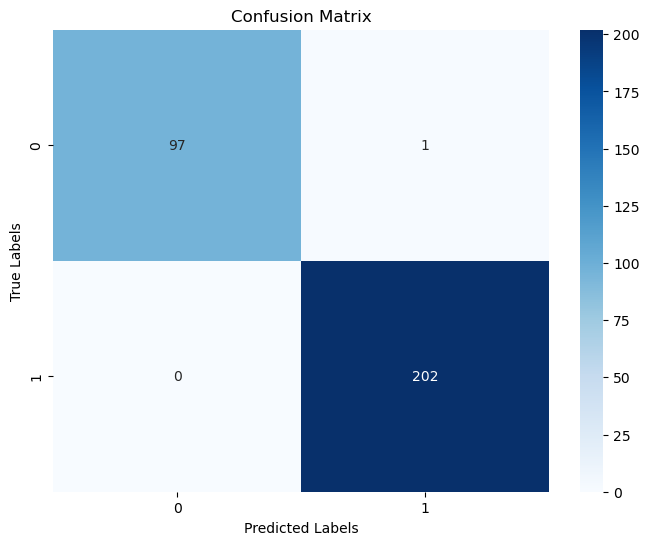

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix_logistic, annot=True, cmap="Blues", fmt="d")
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

## K-means

In [17]:
X = billet.drop(columns=['is_genuine'])
y = billet['is_genuine']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [18]:
from sklearn.cluster import KMeans

kmeans_model = KMeans(n_clusters=2, random_state=42)
kmeans_model.fit(X_train)

KMeans(n_clusters=2, random_state=42)

In [19]:
y_pred_kmeans = 1-kmeans_model.predict(X_test)
confusion_matrix_kmeans = confusion_matrix(y_test, y_pred_kmeans)
print(confusion_matrix_kmeans)

[[ 94   4]
 [  0 202]]


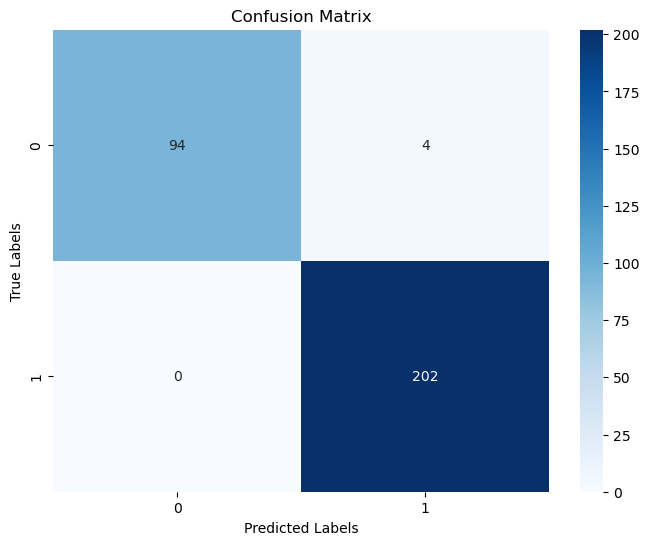

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix_kmeans, annot=True, cmap="Blues", fmt="d")
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [21]:
billet_test=pd.read_csv('C:/Users/lenovo/OneDrive/Desktop/p10/billets_test.csv',delimiter=',')
billet_test.head()

diagonal  height_left  height_right  margin_low  margin_up  length   id
0    172.09       103.95        103.73        4.39       3.09  113.19  B_1
1    171.52       104.17        104.03        5.27       3.16  111.82  B_2
2    171.78       103.80        103.75        3.81       3.24  113.39  B_3
3    172.02       104.08        103.99        5.57       3.30  111.10  B_4
4    171.79       104.34        104.37        5.00       3.07  111.87  B_5

In [22]:
billet_test.drop(columns=['id'],inplace=True)
billet_test.head()

diagonal  height_left  height_right  margin_low  margin_up  length
0    172.09       103.95        103.73        4.39       3.09  113.19
1    171.52       104.17        104.03        5.27       3.16  111.82
2    171.78       103.80        103.75        3.81       3.24  113.39
3    172.02       104.08        103.99        5.57       3.30  111.10
4    171.79       104.34        104.37        5.00       3.07  111.87

In [23]:
y_pred_kmeans = 1-kmeans_model.predict(billet_test)
y_pred_kmeans

array([1, 0, 1, 0, 0])

In [26]:
### resultat du test -> 1=True 0=False

In [24]:
billet_test['intercept']=1
billet_test.head()

diagonal  height_left  height_right  margin_low  margin_up  length  \
0    172.09       103.95        103.73        4.39       3.09  113.19   
1    171.52       104.17        104.03        5.27       3.16  111.82   
2    171.78       103.80        103.75        3.81       3.24  113.39   
3    172.02       104.08        103.99        5.57       3.30  111.10   
4    171.79       104.34        104.37        5.00       3.07  111.87   

   intercept  
0          1  
1          1  
2          1  
3          1  
4          1

In [25]:
y_pred_logistic = result.predict(billet_test).round().astype(int)
y_pred_logistic

0    1
1    0
2    1
3    0
4    0
dtype: int32